In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from cvxopt import matrix
from cvxpy import *
from skimage.measure import block_reduce
from numpy import linalg as LA
import scipy.io
from cvxopt.modeling import dot

In [9]:
filename = 'YaleB_32x32.mat'
data = scipy.io.loadmat(filename)
filename = '50Train/1.mat'
split = scipy.io.loadmat(filename)

In [10]:
trainIdx = split['trainIdx'][:,0] - 1
testIdx = split['testIdx'][:,0] - 1

In [11]:
data_train = data['fea'][trainIdx]
data_test = data['fea'][testIdx]
label_train = data['gnd'][trainIdx]
label_test = data['gnd'][testIdx]

In [12]:
X = data_train[np.argwhere(label_train == 1)[:,0]]
#A= np.transpose(X).reshape(32, 32, 50)
X.shape
#y[0].shape

(50, 1024)

In [13]:
X = data_test[5]
A= np.transpose(X).reshape(32, 32, 1)
A = block_reduce(A, block_size=(6, 5, 1), func=np.max)
A.shape

(6, 7, 1)

In [14]:
n= 38
for d in range(1, n+1):
    D = data['fea'][np.argwhere(data['gnd'] == d)[:,0]]
    X = data_train[np.argwhere(label_train == d)[:,0]]
    y = data_test[np.argwhere(label_test == d)[:,0]]
    X = np.append(X, y[0:9,:], axis =0)
    y = y[9:,:]
    print(D.shape)
    print(X.shape)
    print(y.shape)
    print('==================================')

(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(60, 1024)
(59, 1024)
(1, 1024)
(59, 1024)
(59, 1024)
(0, 1024)
(60, 1024)
(59, 1024)
(1, 1024)
(63, 1024)
(59, 1024)
(4, 1024)
(62, 1024)
(59, 1024)
(3, 1024)
(63, 1024)
(59, 1024)
(4, 1024)
(63, 1024)
(59, 1024)
(4, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 1024)
(59, 1024)
(5, 1024)
(64, 102

In [15]:
data_test.shape

(514, 1024)

In [16]:
r = [[3,4],[4,3]]
print(r)
p = normalize(r, axis=0, norm='l2')
print(p)
print(LA.norm(p[:,0]))

[[3, 4], [4, 3]]
[[ 0.6  0.8]
 [ 0.8  0.6]]
1.0


In [18]:
n=38
W =[]
for d in range(1, n+1):
    X = data_train[np.argwhere(label_train == d)[:,0]]
    y = data_test[np.argwhere(label_test == d)[:,0]]
    X = np.transpose(X).reshape(32, 32, 50)
    X = block_reduce(X, block_size=(6, 5, 1), func=np.max)
    X = normalize(X.reshape(42,50), axis=0, norm='l2')
    #X = normalize(np.transpose(X), axis=0, norm='l2')
    #t = y[0].reshape(1024,1)
    #print(X.shape, t.shape)
    t = np.transpose(y[0])
    t = t.reshape(32,32,1)
    t = block_reduce(t, block_size=(6, 5, 1), func=np.max)
    t = normalize(t.reshape(42,1), axis=0, norm='l2')
    #t = normalize(t, axis=0, norm='l2')
    w = Variable(50,1)
    obj = Minimize(norm(w,1))
    #print(X.shape, t.shape)
    const = [X * w == t]
    prob = Problem(obj,const)
    result = prob.solve(verbose=True)
    W.append(np.array(w.value))

/Users/Bangz/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)



ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +1e+02  8e-01  1e-02  1e+00  1e+00    ---    ---    2  1  - |  -  - 
 1  +5.411e+00  +5.412e+00  +2e+01  3e-01  2e-04  2e-01  2e-01  0.8736  4e-02   1  1  1 |  0  0
 2  +1.106e+01  +1.106e+01  +3e+00  7e-02  3e-05  3e-02  3e-02  0.8278  5e-02   2  1  1 |  0  0
 3  +1.238e+01  +1.238e+01  +4e-01  8e-03  3e-06  4e-03  4e-03  0.8992  3e-02   2  1  1 |  0  0
 4  +1.256e+01  +1.256e+01  +6e-02  1e-03  4e-07  6e-04  6e-04  0.8653  2e-02   1  1  1 |  0  0
 5  +1.259e+01  +1.259e+01  +4e-03  8e-05  3e-08  4e-05  4e-05  0.9416  1e-02   1  1  1 |  0  0
 6  +1.259e+01  +1.259e+01  +5e-05  9e-07  3e-10  5e-07  5e-07  0.9890  1e-04   1  1  1 |  0  0
 7  +1.259e+01  +1.259e+01  +5e-07  1e-08  3e-12  5e-09  5e-09  0.9890  1e-04   2  1  1 |  0  0
 8  +1.259e+01  +1.259e+01  +6e-09  1e-10  4e-

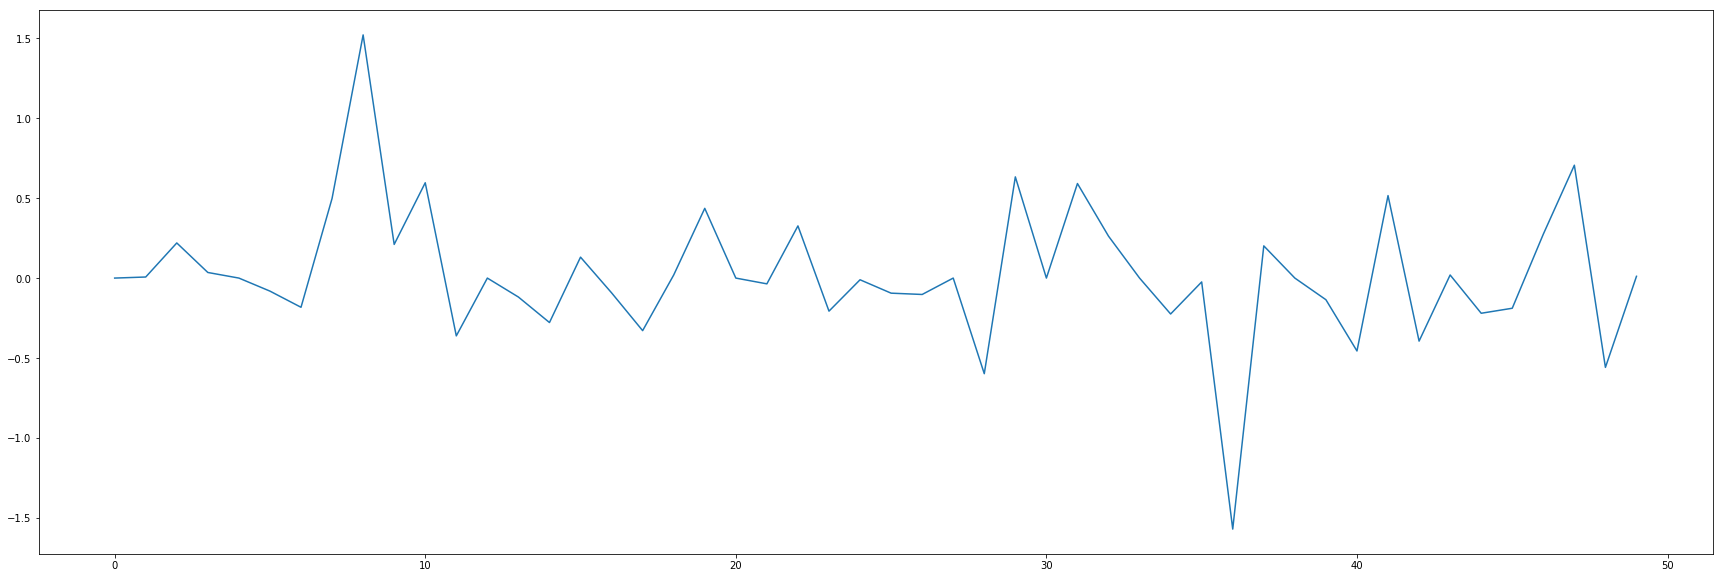

In [19]:
plt.figure(figsize=(30,10))
plt.plot(W[5])
plt.show()

In [20]:
np.where(W[5] > 1)

(array([8]), array([0]))

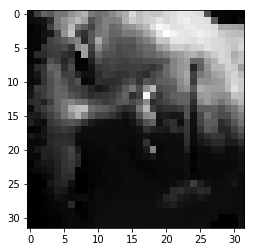

In [42]:
d=5
X = data_train[np.argwhere(label_train == d)[:,0]]
X = X[38]
A= X.reshape(32, 32, 1)
plt.imshow(A[:,:,0], cmap='gray')
plt.show()

In [20]:
pred = 0
res = float("inf")
for d in range(0, n):
    if W[d].size > 1:
        X = data_train[np.argwhere(label_train == d+1)[:,0]]
        y = data_test[np.argwhere(label_test == d+1)[:,0]]
        #X = np.append(X, y[0:8,:], axis =0)
        #y = y[8:,:]
        #print(X.shape)
        X = np.transpose(X).reshape(32, 32, 50)
        X = block_reduce(X, block_size=(6, 4, 1), func=np.max)
        X = normalize(X.reshape(48,50), axis=0, norm='l2')
        t = y[0]
        t = t.reshape(32,32,1)
        t = block_reduce(t, block_size=(6, 4, 1), func=np.max)
        t = normalize(t.reshape(48,1), axis=0, norm='l2')
        temp = LA.norm(t - np.dot(X, W[d]))
        #print('temp', temp)
        print('res', res)
        if temp < res:
            res = temp
            pred = d+1
print('Prediction :', pred)        

res inf
res 8.27732667746e-13
res 8.27732667746e-13
res 8.27732667746e-13
res 8.27732667746e-13
res 8.27732667746e-13
res 8.27732667746e-13
res 8.27732667746e-13
res 8.27732667746e-13
res 8.27732667746e-13
res 8.27732667746e-13
res 8.27732667746e-13
res 8.27732667746e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
res 6.47436209995e-13
Prediction : 13


/Users/Bangz/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


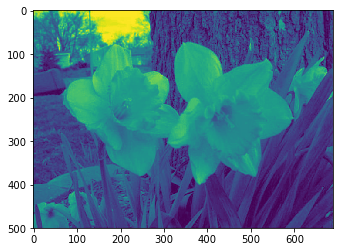

In [12]:
from PIL import Image
im = Image.open('jpg/image_0001.jpg')
import matplotlib.pyplot as plt
plt.imshow(im.convert(mode='L', dither=0))
plt.show()